In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [3]:
train_dir = 'train'
test_dir = 'test'


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 210 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

2024-08-06 11:40:10.514643: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-06 11:40:10.515145: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(train_generator, epochs=20, validation_data=test_generator)

Epoch 1/20
7/7 [==============================] - 4s 442ms/step - loss: 1.1954 - accuracy: 0.5381 - val_loss: 0.6332 - val_accuracy: 0.5455
Epoch 2/20
7/7 [==============================] - 3s 398ms/step - loss: 0.5920 - accuracy: 0.6667 - val_loss: 0.3414 - val_accuracy: 1.0000
Epoch 3/20
7/7 [==============================] - 3s 400ms/step - loss: 0.4064 - accuracy: 0.8429 - val_loss: 0.1744 - val_accuracy: 1.0000
Epoch 4/20
7/7 [==============================] - 3s 404ms/step - loss: 0.2570 - accuracy: 0.8810 - val_loss: 0.0370 - val_accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 3s 399ms/step - loss: 0.2523 - accuracy: 0.8952 - val_loss: 0.0760 - val_accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 3s 412ms/step - loss: 0.2364 - accuracy: 0.9000 - val_loss: 0.1671 - val_accuracy: 0.9091
Epoch 7/20
7/7 [==============================] - 3s 404ms/step - loss: 0.1840 - accuracy: 0.9333 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 8/20
7/7 [====

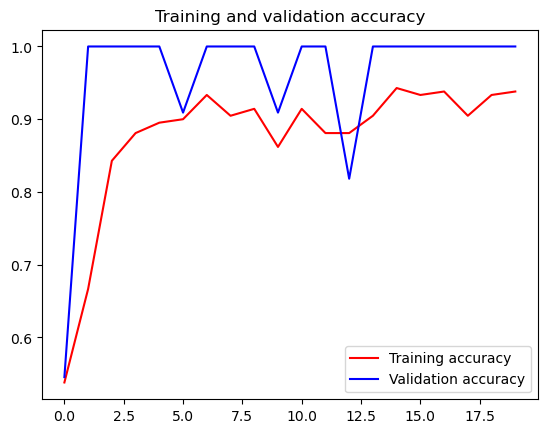

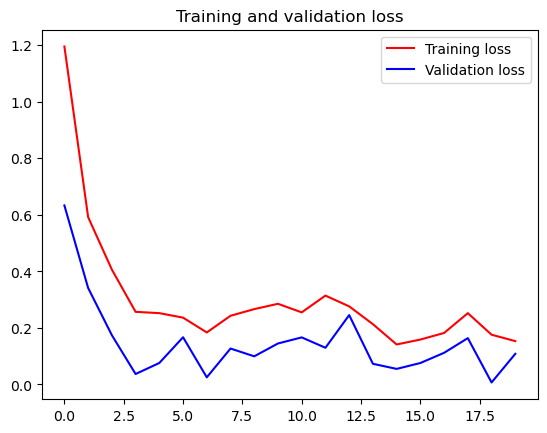

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

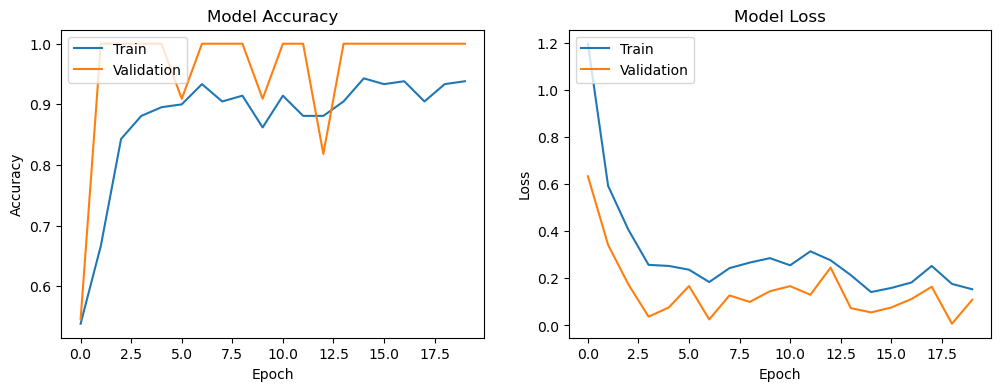

In [9]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:

def predict_image(model, img_path):
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print(f'The image is predicted to be a skin cancer image.')
    else:
        print(f'The image is predicted to be a non-skin cancer image.')

In [17]:
predict_image(model, 'temp.jpg')


1/1 [==============================] - 0s 22ms/step
The image is predicted to be a skin cancer image.


In [68]:
model.save('skin_cancer_classifier.h5')

/home/santhu/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
